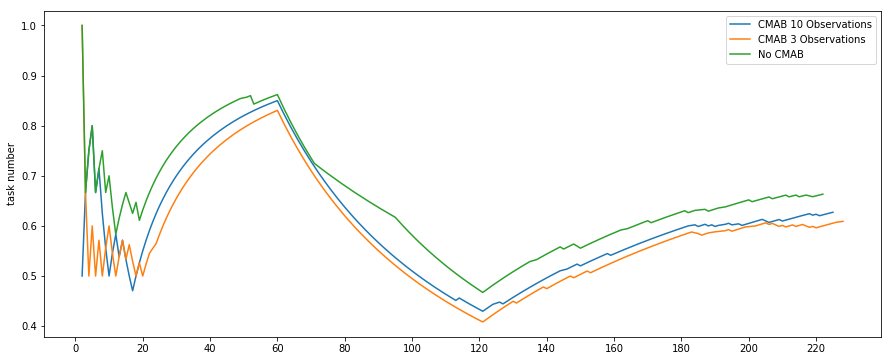

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw_cmab = pd.read_csv("/home/simon/hrc_industry_ss18/code/results/cmab/raw_data.csv")
obs_cmab =pd.read_csv("/home/simon/hrc_industry_ss18/code/results/cmab/human_observables.csv")
status_cmab =pd.read_csv("/home/simon/hrc_industry_ss18/code/results/cmab/task_status.csv")
success_cmab = status_cmab.task_status=='"SUCCESS"'
rate_cmab = np.cumsum(success_cmab)/np.cumsum(np.ones(len(success_cmab)))

raw_nocmab = pd.read_csv("/home/simon/hrc_industry_ss18/code/results/nocmab/raw_data.csv")
obs_nocmab =pd.read_csv("/home/simon/hrc_industry_ss18/code/results/nocmab/human_observables.csv")
status_nocmab =pd.read_csv("/home/simon/hrc_industry_ss18/code/results/nocmab/task_status.csv")
success_nocmab = status_nocmab.task_status=='"SUCCESS"'
rate_nocmab = np.cumsum(success_nocmab)/np.cumsum(np.ones(len(success_nocmab)))

raw_cmab3 = pd.read_csv("/home/simon/hrc_industry_ss18/code/results/cmab_3obs/raw_data.csv")
#obs_cmab3 =pd.read_csv("/home/simon/hrc_industry_ss18/code/results/cmab_3obs/human_observables.csv")
status_cmab3 =pd.read_csv("/home/simon/hrc_industry_ss18/code/results/cmab_3obs/task_status.csv")
success_cmab3 = status_cmab3.task_status=='"SUCCESS"'
rate_cmab3 = np.cumsum(success_cmab3)/np.cumsum(np.ones(len(success_cmab3)))

plt.figure(figsize=(15,6))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.plot(status_cmab.task_id[1:220],rate_cmab[1:220], label ="CMAB 10 Observations")
plt.plot(status_cmab3.task_id[1:220],rate_cmab3[1:220], label ="CMAB 3 Observations")
plt.plot(status_nocmab.task_id[1:220],rate_nocmab[1:220], label ="No CMAB")
plt.ylabel('task number')
plt.legend()
plt.show()

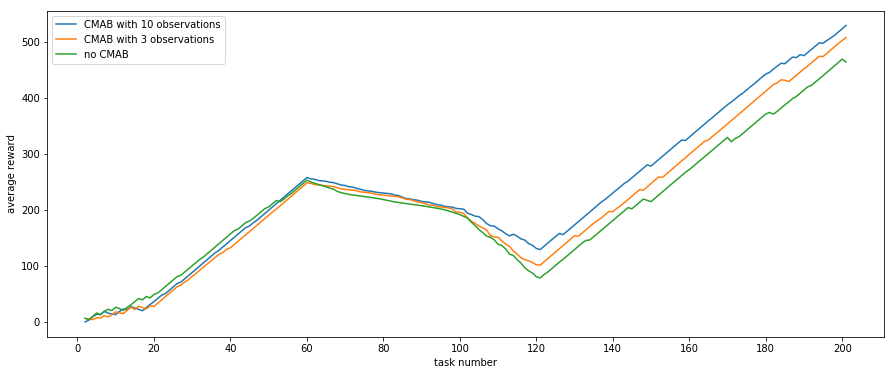

In [22]:
import re
plt.figure(figsize=(15,6))
ax = plt.axes()
#ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.xlabel('task number')
plt.ylabel('average reward')
plt.xticks(list(range(0,240,20)))
dfs = [raw_cmab,raw_cmab3,raw_nocmab]
for i in range(3):
    data = dfs[i]
    scores = data[data.total_disc_reward != "''"]
    scores = scores[['task_id','total_disc_reward']]
    valid = scores.total_disc_reward.apply(lambda x: re.findall("\d+\.\d+",x)!=[])
    scores = scores[valid]
    models = data[data.human_type!="''"][['task_id','human_type','robot_model']]
    scores.total_disc_reward=scores.total_disc_reward.apply(lambda x: float(x[1:-1]))
    scores = pd.merge(models, scores, on='task_id', how='left')
    scores =scores.dropna()
    interval = np.logical_and(scores.task_id > 1,scores.task_id <202)
    scores = scores[interval]
    ids = scores.task_id.unique()
    scores = scores.groupby(['task_id']).last()
    scores = scores.total_disc_reward.values
    scores = np.cumsum(scores)
    if i == 0:
        plt.plot(ids,scores, label = "CMAB with 10 observations")
    if i == 1:
        plt.plot(ids,scores, label = "CMAB with 3 observations")
    if i == 2:
        plt.plot(ids,scores, label = "no CMAB")
        
plt.legend()
plt.show()

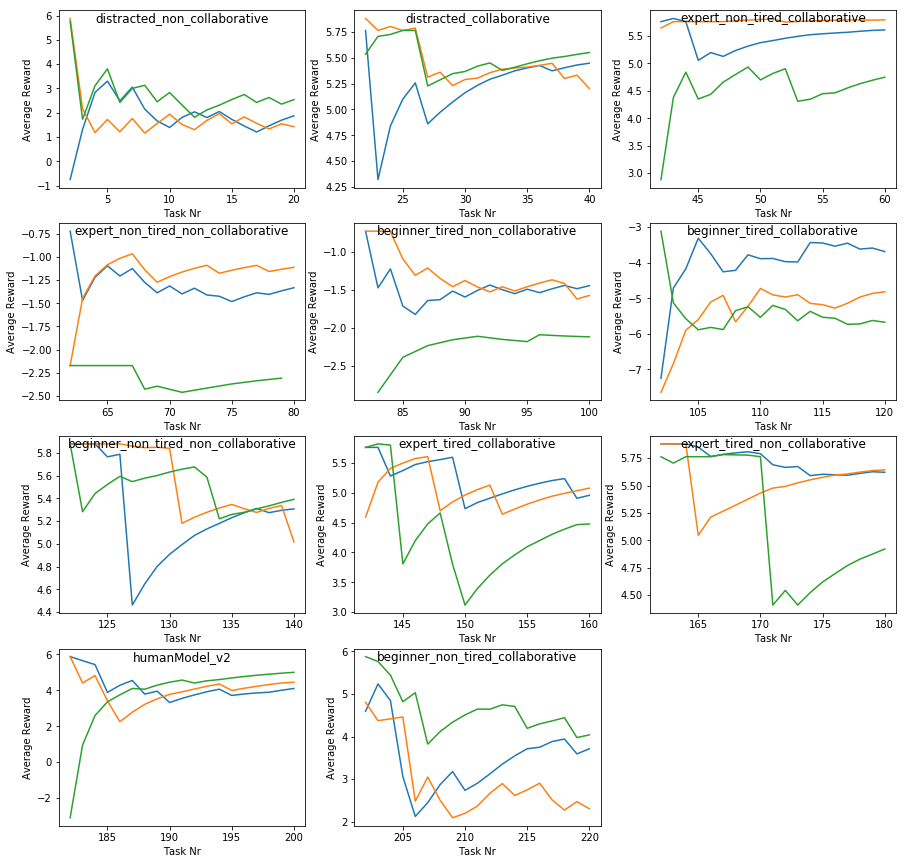

In [24]:
import re
#ax.xaxis.set_major_locator(plt.MultipleLocator(20))
dfs = [raw_cmab,raw_cmab3,raw_nocmab]
f, axarr = plt.subplots(4, 3,figsize=(15,15))
plt.setp(axarr, xticks=list(range(0,230,5)))
titles = ["distracted_non_collaborative",
"distracted_collaborative",
 "expert_non_tired_collaborative",
 "expert_non_tired_non_collaborative",
 "beginner_tired_non_collaborative",
 "beginner_tired_collaborative",
 "beginner_non_tired_non_collaborative",
 "expert_tired_collaborative",
 "expert_tired_non_collaborative",
 "humanModel_v2",
 "beginner_non_tired_collaborative"]
for k in range(11):#
    i=int(k/3)
    j=k%3
    for d in range(3):
        data = dfs[d]
        scores = data[data.total_disc_reward != "''"]
        scores = scores[['task_id','total_disc_reward']]
        valid = scores.total_disc_reward.apply(lambda x: re.findall("\d+\.\d+",x)!=[])
        scores = scores[valid]
        models = data[data.human_type!="''"][['task_id','human_type','robot_model']]
        scores.total_disc_reward=scores.total_disc_reward.apply(lambda x: float(x[1:-1]))
        scores = pd.merge(models, scores, on='task_id', how='left')
        scores =scores.dropna()
        interval = np.logical_and(scores.task_id > 1+k*20,scores.task_id <1+(k+1)*20)
        scores = scores[interval]
        ids = scores.task_id.unique()
        scores = scores.groupby(['task_id']).last()
        scores = scores.total_disc_reward.values
        scores = np.cumsum(scores)/np.cumsum(np.ones(len(scores)))
        if d == 0:
            axarr[i, j].plot(ids,scores, label = "CMAB with 10 observations")
            #plt.plot(ids,scores, label = "CMAB with 10 observations")
        if d == 1:
            axarr[i, j].plot(ids,scores, label = "CMAB with 3 observations")
            #plt.plot(ids,scores, label = "CMAB with 3 observations")
        if d == 2:
            axarr[i, j].plot(ids,scores, label = "Proactive Robot Policy",)
            #plt.plot(ids,scores, label = "no CMAB")
        axarr[i, j].set_xlabel('Task Nr')
        axarr[i, j].set_ylabel('Average Reward')
        axarr[i, j].set_title(titles[k],position=(0.5,0.9))



        
axarr[-1,-1].axis('off')
plt.show()

In [213]:
int(3/4)

0

In [111]:
import numpy as np
import pickle
bytes_read = open("covs.bin", "rb").read()
covs = pickle.loads(bytes_read)
bytes_read = open("means.bin", "rb").read()
means = pickle.loads(bytes_read)

bytes_read = open("humanDict.bin", "rb").read()
humanDict = pickle.loads(bytes_read)
bytes_read = open("humanDictInv.bin", "rb").read()
humanDictInv = pickle.loads(bytes_read)

bytes_read = open("robotDict.bin", "rb").read()
robotDict = pickle.loads(bytes_read)
bytes_read = open("robotDictInv.bin", "rb").read()
robotDictInv = pickle.loads(bytes_read)

bytes_read = open("lut.bin", "rb").read()
lut = pickle.loads(bytes_read)

bytes_read = open("scores.bin", "rb").read()
scores = pickle.loads(bytes_read)
#scores[np.logical_and(scores.human_type=='"beginner_non_tired_collaborative.POMDPx"', scores.robot_model=='"proactive_robot_pomdp.pomdpx"')]
scores2

,human_type_x,robot_model_x,human_type_y,robot_model_y,total_disc_reward
task_id,,,,,
2,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_tired.pomdpx""",-0.753642
3,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",3.381720
4,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",5.880000
5,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_beginner.pomdpx""",4.686750
6,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",-0.753642
7,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",5.880000
8,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",-3.295340
9,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",-1.725910
10,"""distracted_collaborative.POMDPx""",'',"""distracted_collaborative.POMDPx""","""proactive_robot_pomdp_non-collaborative.pomdpx""",-0.769022
